### Part A

In [1]:
import pandas as pd # for data anlysis and manipulation
import numpy as np # library of mathematical operations
import seaborn as sns # to create confusion matrix
import sklearn # libaray of supervised and unsupervised machine learning algorithms
import matplotlib.pyplot as plt # to display charts

In [2]:
# to read the csv file 
train = pd.read_csv('CE802_P3_Data.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1500 non-null   float64
 1   F2      1500 non-null   float64
 2   F3      1500 non-null   float64
 3   F4      1500 non-null   float64
 4   F5      1500 non-null   float64
 5   F6      1500 non-null   float64
 6   F7      1500 non-null   float64
 7   F8      1500 non-null   float64
 8   F9      1500 non-null   float64
 9   F10     1500 non-null   float64
 10  F11     1500 non-null   int64  
 11  F12     1500 non-null   float64
 12  F13     1500 non-null   float64
 13  F14     1500 non-null   float64
 14  F15     1500 non-null   float64
 15  F16     1500 non-null   float64
 16  F17     1500 non-null   float64
 17  F18     1500 non-null   float64
 18  F19     1500 non-null   float64
 19  F20     1500 non-null   object 
 20  F21     1500 non-null   float64
 21  F22     1500 non-null   float64
 22  

In [3]:
train.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F28,F29,F30,F31,F32,F33,F34,F35,F36,Target
0,854.04,-15267.84,193.04,12132.20,464.22,-19.81,920.42,11.84,-38.02,8.35,...,-100.43,10497.32,8,-46.22,91.89,-41.70,-849.78,-5.12,4261.68,609.09
1,1748.76,-4299.45,439.72,18046.14,540.36,-8.55,1913.78,11.28,122.02,-8.83,...,-97.41,16792.88,4,51.24,-450.34,-75.30,-1801.59,-0.16,2737.58,232.66
2,834.44,-18927.93,-85.86,18533.56,611.34,-15.88,1956.90,10.00,-24.26,-54.33,...,-135.59,-5647.94,6,40.93,-471.02,-55.50,-2529.75,8.50,3696.64,480.01
3,1429.36,3653.73,-59.69,31314.52,408.45,-9.67,1628.18,11.59,90.88,-38.87,...,-85.77,6869.46,2,-9.19,-290.45,-67.86,-2915.34,9.76,2919.54,1685.20
4,188.80,-3932.07,128.70,22837.34,530.22,-14.93,1218.16,9.55,-93.78,-61.95,...,-75.76,16974.08,2,100.86,-850.10,-64.95,-2154.12,13.42,2693.48,617.96


In [4]:
# to convert categorical values into numerical values
cleanup = {"F20": {"Very low":1, "Low":2, "Medium":3, "High":4, "Very high":5}}
train.replace(cleanup, inplace=True)

In [5]:
# to create dummy variables for categorical variable with no ordinal relationship
train = pd.get_dummies(train, columns= ['F27'])

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 40 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   F1          1500 non-null   float64
 1   F2          1500 non-null   float64
 2   F3          1500 non-null   float64
 3   F4          1500 non-null   float64
 4   F5          1500 non-null   float64
 5   F6          1500 non-null   float64
 6   F7          1500 non-null   float64
 7   F8          1500 non-null   float64
 8   F9          1500 non-null   float64
 9   F10         1500 non-null   float64
 10  F11         1500 non-null   int64  
 11  F12         1500 non-null   float64
 12  F13         1500 non-null   float64
 13  F14         1500 non-null   float64
 14  F15         1500 non-null   float64
 15  F16         1500 non-null   float64
 16  F17         1500 non-null   float64
 17  F18         1500 non-null   float64
 18  F19         1500 non-null   float64
 19  F20         1500 non-null  

<AxesSubplot:>

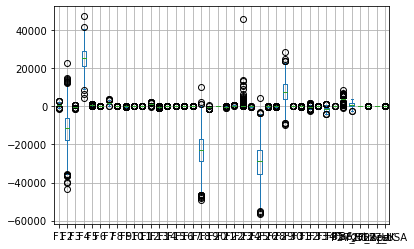

In [7]:
# to check for outliers in the dataset using box-plot
train.plot.box(grid='True')

In [8]:
# to find absolute value of z-score for each observation
import scipy.stats as stats

z = np.abs(stats.zscore(train))

In [9]:
# to keep rows in dataset with all z-scores less than absolute value of 3 i.e. removing outliers
data_clean = train[(z<3).all(axis=1)]

In [10]:
# to find the number of rows are left in the dataset
data_clean.shape

(1155, 40)

In [11]:
# to check for multicollinearity
train.corr()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F32,F33,F34,F35,F36,Target,F27_Europe,F27_Rest,F27_UK,F27_USA
F1,1.000000,-0.003659,0.035298,0.014359,-0.040740,-0.013651,0.024800,0.026076,0.030989,0.004988,...,-0.027667,0.009650,-0.036779,0.044330,-0.022534,-0.078041,0.024647,-0.016755,-0.045653,0.037725
F2,-0.003659,1.000000,-0.052275,-0.002121,0.003888,0.022243,0.028834,-0.001398,0.044879,0.040660,...,-0.016429,-0.011481,-0.047202,-0.005585,-0.025202,0.004574,-0.018977,0.046380,0.027942,-0.055257
F3,0.035298,-0.052275,1.000000,-0.044274,-0.087653,0.009539,0.014746,0.008872,0.030663,-0.022430,...,-0.023047,0.019350,0.013028,-0.007120,0.016651,-0.293027,0.006055,-0.044994,0.016570,0.022043
F4,0.014359,-0.002121,-0.044274,1.000000,-0.006826,0.020129,0.035333,-0.048328,0.066272,-0.071179,...,-0.029890,-0.015456,0.011997,-0.023654,-0.030881,-0.017988,-0.017412,0.004172,0.028824,-0.015507
F5,-0.040740,0.003888,-0.087653,-0.006826,1.000000,-0.032258,-0.015535,-0.010064,0.040706,0.007659,...,0.004716,-0.002243,-0.027093,0.014935,-0.010702,0.056762,-0.009252,-0.023213,0.015627,0.016899
F6,-0.013651,0.022243,0.009539,0.020129,-0.032258,1.000000,-0.009002,-0.064904,-0.052148,0.007015,...,0.010559,-0.008730,-0.036331,-0.010545,0.023004,-0.015091,-0.002359,-0.056279,0.028934,0.029448
F7,0.024800,0.028834,0.014746,0.035333,-0.015535,-0.009002,1.000000,0.009947,0.027744,-0.006240,...,0.039682,0.017692,0.014793,-0.041653,-0.004735,-0.003702,-0.012139,0.034812,-0.007618,-0.014678
F8,0.026076,-0.001398,0.008872,-0.048328,-0.010064,-0.064904,0.009947,1.000000,0.009145,-0.032667,...,0.004333,0.023208,-0.001547,-0.001646,0.063963,-0.048893,-0.030107,0.048409,-0.010572,-0.006865
F9,0.030989,0.044879,0.030663,0.066272,0.040706,-0.052148,0.027744,0.009145,1.000000,-0.002640,...,-0.044032,0.036008,-0.025189,-0.020870,-0.018239,-0.041725,0.011722,-0.033214,0.002936,0.018248
F10,0.004988,0.040660,-0.022430,-0.071179,0.007659,0.007015,-0.006240,-0.032667,-0.002640,1.000000,...,0.007537,0.000716,0.030446,0.000894,0.012377,0.018111,-0.019517,0.013715,-0.017361,0.023874


In [12]:
# to split the data into train and test datasets 
from sklearn.model_selection import train_test_split 

X = data_clean.drop('Target',axis=1)
y = data_clean[['Target']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state=47)

# Linear Regression

In [13]:
# to fit a Linear Regression model on traing data
from sklearn.linear_model import LinearRegression 

regr = LinearRegression() 
regr.fit(X_train, y_train['Target'])

LinearRegression()

In [14]:
train_score = regr.score(X_train, y_train)*100 # the accuarcy of the Linear Regression model for the training data
print("The score of the model on train data is: %.4f%%" % train_score)

The score of the model on train data is: 71.0995%


In [15]:
test_score = regr.score(X_test, y_test)*100 # the accuarcy of the Linear Regression model for the testing data
print("The score of the model on test data is:  %.4f%%" % test_score )

The score of the model on test data is:  71.5175%


# Gradient Boosting

In [16]:
# to fit a Gradient Boosting Regression model on training data
from sklearn.ensemble import GradientBoostingRegressor

grad = GradientBoostingRegressor()
grad.fit(X_train,y_train['Target'])

GradientBoostingRegressor()

In [17]:
train_score = grad.score(X_train,y_train)*100 # the accuarcy of the Gradient Boosting Regression model for the training data
print("The score of the model on train data is: %.4f%%" % train_score)

The score of the model on train data is: 94.7161%


In [18]:
test_score = grad.score(X_test,y_test)*100 # the accuarcy of the Gradient Boosting Regression model for the testing data
print("The score of the model on test data is: %.4f%%" % test_score)

The score of the model on test data is: 83.8619%


# Randon Forest 

In [19]:
from sklearn.ensemble import RandomForestRegressor 
mod2 = RandomForestRegressor()

In [20]:
mod2.fit(X_train, y_train['Target'])

RandomForestRegressor()

In [21]:
train_score = mod2.score(X_train, y_train)*100 # the accuarcy of the Random Forest model for the training data
print("The score of the model on train data is: %.4f%%" % train_score)

The score of the model on train data is: 95.1792%


In [22]:
test_score = mod2.score(X_test, y_test)*100 # the accuarcy of the Random Forest model for the testing data
print("The score of the model on test data is: %.4f%%" % test_score)

The score of the model on test data is: 67.5589%


### Part B

In [23]:
# HERE YOU WILL USE THIS TEMPLATE TO SAVE THE PREDICTIONS ON THE TEST SET

# Load the test data
test_df = pd.read_csv('CE802_P3_Test.csv')

# Make sure you work on a copy
test_data = test_df.iloc[:,:-1].copy()

cleanup = {"F20": {"Very low":1, "Low":2, "Medium":3, "High":4, "Very high":5}}
test_data.replace(cleanup, inplace=True)

test_data = pd.get_dummies(test_data, columns= ['F27'])

predicted = grad.predict(test_data)

# Replace the last (empty) column with your prediction
test_df.iloc[:,-1] = predicted

# Save to the destination file
test_df.to_csv('CE802_P3_Test_Predictions.csv', index=False, float_format='%.8g')

# IMPORTANT!! Make sure only the last column has changed
assert pd.read_csv('CE802_P3_Test.csv').iloc[:,:-1].equals(pd.read_csv('CE802_P3_Test_Predictions.csv').iloc[:,:-1])